# Import modules

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Sigmoid function and derivative


In [2]:
# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid Function
def derivative_sigmoid(x):
    return x * (1 - x)

# Data

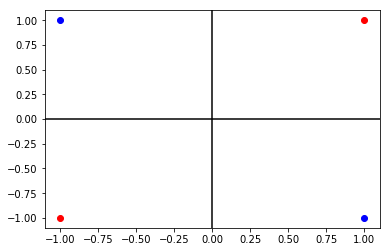

In [3]:
# input
x = np.array([[1,1], [1,-1], [-1,-1], [-1,1]])
# output
y = np.array([[0], [1], [0], [1]])

# plot the training data
fig, ax = plt.subplots()
for i in range(y.shape[0]):
  if y[i][0] == 0:
    marker = 'ro'
  else:
    marker = 'bo'
  ax.plot(x[i][0], x[i][1], marker)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

# With single layer perceptron

## Layer

In [4]:
epoch = 5000 # number of training iterations
learning_rate = 0.1

# dimension of each layer
d_in = x.shape[1] # number of features in the input dataset
d_out = 1 # output layer

# weight and bias initialization
wout = np.random.uniform(size=(d_in, 1))
bout = np.random.uniform(size=(1, d_out))

## Training

Epoch 0 : 1.0
Epoch 500 : 1.0
Epoch 1000 : 1.0
Epoch 1500 : 1.0
Epoch 2000 : 1.0
Epoch 2500 : 1.0
Epoch 3000 : 1.0
Epoch 3500 : 1.0
Epoch 4000 : 1.0
Epoch 4500 : 1.0


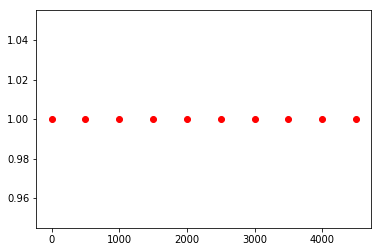

In [6]:
fig, ax = plt.subplots()
for i in range(epoch):
    # Forward pass
    y_pred = sigmoid(x.dot(wout) + bout)
    
    # Compute and print loss
    loss = np.square(y_pred - y)
    if i % 500 == 0:
        print('Epoch', i, ':', loss.sum())
        ax.plot(i, loss.sum(), 'ro')
    # Backpropagation to compute gradients
    grad_y_pred = (y - y_pred) * derivative_sigmoid(y_pred)
    grad_wout = x.T.dot(grad_y_pred)
    grad_bout = np.sum(grad_y_pred, axis=0, keepdims=True)
    
    # Update weights and biases
    wout += grad_wout * learning_rate
    bout += grad_bout * learning_rate

## Prediction

In [7]:
print('Input')
print(x)
print('Label')
print(y)
print('Output')
print(y_pred)
print('Weight')
print(wout)
print('Bias')
print(bout)

Input
[[ 1  1]
 [ 1 -1]
 [-1 -1]
 [-1  1]]
Label
[[0]
 [1]
 [0]
 [1]]
Output
[[0.5]
 [0.5]
 [0.5]
 [0.5]]
Weight
[[4.36851795e-18]
 [2.31378255e-16]]
Bias
[[-7.34469382e-17]]


# With multi layer perceptron

## Layer

In [ ]:
epoch = 5000 # number of training iterations
learning_rate = 0.1

# dimension of each layer
d_in = x.shape[1] # number of features in the input dataset
d_h = 2   # hidden layer
d_out = 1 # output layer

# weight and bias initialization
wh = np.random.uniform(size=(d_in, d_h))
bh = np.random.uniform(size=(1, d_h))
wout = np.random.uniform(size=(d_h, d_out))
bout = np.random.uniform(size=(1, d_out))

## Training

In [ ]:
for i in range(epoch):
    # Forward pass
    h = sigmoid(x.dot(wh) + bh)
    y_pred = sigmoid(h.dot(wout) + bout)
    
    # Compute and print loss
    loss = np.square(y_pred - y)
    if i % 500 == 0:
        print('Epoch', i, ':', loss.sum())

    # Backpropagation to compute gradients
    grad_y_pred = (y - y_pred) * derivative_sigmoid(y_pred)
    grad_wout = h.T.dot(grad_y_pred)
    grad_bout = np.sum(grad_y_pred, axis=0, keepdims=True)
    grad_h = grad_y_pred.dot(wout.T) * derivative_sigmoid(h)
    grad_wh = x.T.dot(grad_h)
    grad_bh = np.sum(grad_h, axis=0, keepdims=True)

    # Update weights and biases
    wout += grad_wout * learning_rate
    bout += grad_bout * learning_rate
    wh += grad_wh * learning_rate
    bh += grad_bh * learning_rate
    


## Prediction

In [ ]:
print('Input')
print(x)
print('Label')
print(y)
print('Output')
print(y_pred)
print('Weight @ Hidden layer')
print(wh)
print('Bias @ Hidden layer')
print(bh)
print('Weight @ Output layer')
print(wout)
print('Bias @ Output layer')
print(bout)